In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

####  разделяем данные на надор для обучения и тесовый

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 46s 4us/step
(60000, 28, 28) (60000,)


In [3]:
num_classes = 10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

#### преобразование векторных классов в бинарные матрицы

In [4]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('Размерность x_train:', x_train.shape)
print(x_train.shape[0], 'Размер train')
print(x_test.shape[0], 'Размер test')


Размерность x_train: (60000, 28, 28, 1)
60000 Размер train
10000 Размер test


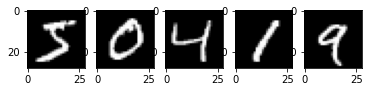

In [5]:
import numpy as np
import matplotlib.pyplot as plt
try:
    for index, (image, label) in enumerate(zip(x_train, y_train)):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
except:
    pass

In [6]:
batch_size = 128
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy'])

In [7]:
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("Модель успешно обучена")

model.save('mnist.h5')
print("Модель сохранена как mnist.h5")

Epoch 1/10
469/469 [==============================] - 558s 1s/step - loss: 2.2664 - accuracy: 0.1732 - val_loss: 2.2056 - val_accuracy: 0.4458
Epoch 2/10
469/469 [==============================] - 489s 1s/step - loss: 2.1695 - accuracy: 0.3345 - val_loss: 2.0821 - val_accuracy: 0.6326
Epoch 3/10
469/469 [==============================] - 540s 1s/step - loss: 2.0392 - accuracy: 0.4629 - val_loss: 1.9113 - val_accuracy: 0.7164
Epoch 4/10
469/469 [==============================] - 532s 1s/step - loss: 1.8587 - accuracy: 0.5583 - val_loss: 1.6843 - val_accuracy: 0.7609
Epoch 5/10
469/469 [==============================] - 540s 1s/step - loss: 1.6392 - accuracy: 0.6126 - val_loss: 1.4202 - val_accuracy: 0.7902
Epoch 6/10
469/469 [==============================] - 603s 1s/step - loss: 1.4059 - accuracy: 0.6551 - val_loss: 1.1669 - val_accuracy: 0.8107
Epoch 7/10
469/469 [==============================] - 480s 1s/step - loss: 1.2102 - accuracy: 0.6815 - val_loss: 0.9637 - val_accuracy: 0.8248

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Потери на тесте:', score[0])
print('Точность на тесте:', score[1])

Потери на тесте: 0.6389588117599487
Точность на тесте: 0.8539000153541565
